# Predictor de precios de laptops

Modelo de Machine Learning supervisado desarrollado para la competición pública [El Precio de las Laptops](https://www.kaggle.com/competitions/precio-de-las-laptop/overview) en la plataforma [Kaggle](https://www.kaggle.com) durante el Bootcamp de Data Science de The Bridge | Digital Talent Accelerator. Esta competición se tomó como referencia la métrica MAE (mean absolute error/error promedio en valor absoluto), gana el modelo que tenga menor margen respecto de esta, el scoring final en la clasificación fue de 178.71618 con un modelo RandomForestRegresor, el de menos error de todos los alumnos de la clase, segundo lugar de la competición ya que participó gente externa a la escuela. 

¡Vamos a verlo!


# Imports

In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from models import *

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data

In [2]:
# Leemos el dataset de entrenamiento y vemos una porción para tener una idea de la forma de los datos
train = pd.read_csv("Dataset/data/train.csv", index_col=0)
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
id,,,,,,,,,,,,
852,Dell,Inspiron 5767,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Linux,2.83kg,865.0
414,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg,928.0
283,Lenovo,Ideapad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,579.0
669,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Linux,2.1kg,412.0
1287,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0


# EDA

In [3]:
train.info() # Visualizamos el DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 852 to 373
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_euros       912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
train.isnull().sum() # Verificamos que no tenga datos nulos

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

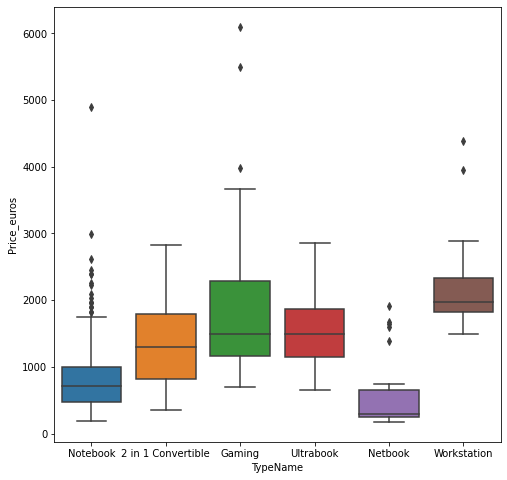

In [5]:
plt.figure(figsize=(8,8))
sns.boxplot(train["TypeName"], train["Price_euros"]) # Visualizamos las medianas de los costes por tipo de ordenador

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

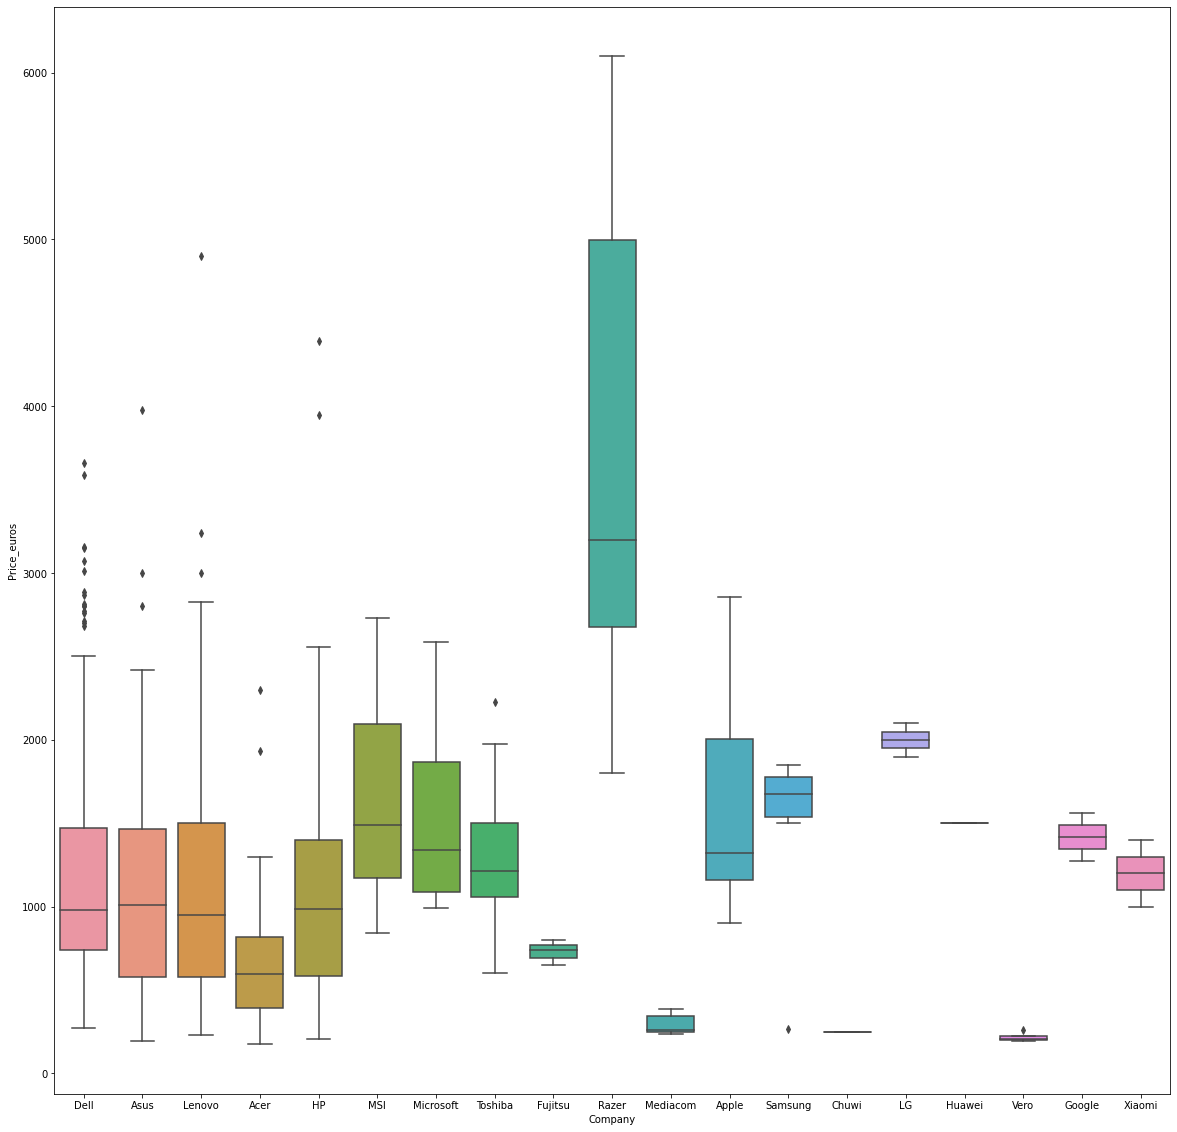

In [6]:
plt.figure(figsize=(20,20))
sns.boxplot(train["Company"], train["Price_euros"]) # Visualizamos las medianas de los costes por fabricante

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

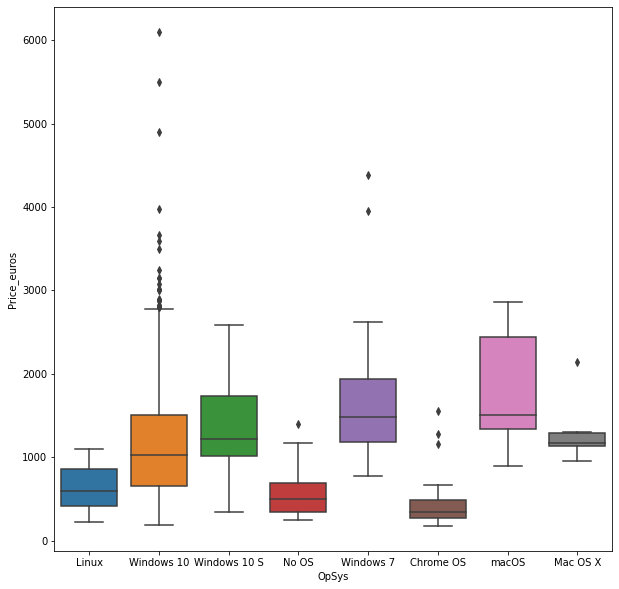

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(train["OpSys"], train["Price_euros"]) # Visualizamos las medianas de los costes por sistema operativo

In [8]:
np.array(train["Cpu"].unique()) # Visualizamos la forma en que vienen descritos los procesadores de los ordenadores

array(['Intel Core i7 7500U 2.7GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i7 6500U 2.5GHz',
       'AMD Ryzen 1700 3GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7600U 2.8GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i3 6100U 2.3GHz', 'AMD A10-Series 9600P 2.4GHz',
       'Intel Core i7 6600U 2.6GHz', 'Intel Core i5 6300HQ 2.3GHz',
       'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Core i7 6500U 2.50GHz', 'AMD FX 8800P 2.1GHz',
       'AMD A6-Series 9220 2.5GHz', 'Intel Core i7 7Y75 1.3GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 7500U 2.5GHz', 'AMD A9-Series 9410 2.9GHz',
       'Intel Pentiu

# Feature Engineering

Observamos que la mayoría de las variables del dataset son categóricas y las pocas numéricas que vienen son de tipo ```str```, por lo cual vamos a limpiar esos datos y a clasificar las variables categóricas lo mejor posible para maximizar la precisión del modelo.  

Es decir, transformaremos cada tipo de variables en función de su mediana, dando un mayor valor a las categorías que tengan las medianas más altas. Para ello utilizaremos un label encoder. 

Como estamos trabajando con modelos de regresión, lo haremos de forma diferente para poder orientar el resultado a la realidad, es decir, ordenaremos todo por calidad, entendiendo que los productos, categorías o gamas de mayor calidad o potencia son más costosas que el resto.

Las funciones que hacen el feature engineering están declaradas en el fichero ```models.py```

Aplicamos las funciones al dataset de train

In [9]:
train = pd.read_csv("Dataset/data/train.csv", index_col=0)
train["tipo"] = train.apply(tipo, axis=1)
train["peso"] = train.apply(limpia_peso, axis=1)
train["resolucion"] = train.apply(resolucion, axis=1)    # Aplicamos las funciones sobre el DataFrame de entrenamiento
train["sistema"] = train.apply(sistema, axis=1)
train["ram"] = train.apply(ram, axis=1)
train["cpu"] = train.apply(cpu, axis=1)
train["almacenamiento"] = train.apply(almacenamiento, axis = 1)
train["almacenamiento_tipo"] = train.apply(almacenamiento_tipo, axis = 1)
train["company"] = train.apply(company, axis=1)
train["potencia"] = train.apply(potencia, axis=1)
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,tipo,peso,resolucion,sistema,ram,cpu,almacenamiento,almacenamiento_tipo,company,potencia
id,,,,,,,,,,,,,,,,,,,,,
852,Dell,Inspiron 5767,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Linux,...,1,2.83,3,2,8,8,1024,1,10,2.7
414,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,...,2,1.27,3,3,8,8,256,3,11,2.5
283,Lenovo,Ideapad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Intel HD Graphics 620,Windows 10,...,1,2.20,3,3,6,8,256,3,8,2.5
669,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Linux,...,1,2.10,5,2,4,6,128,3,6,2.0
1287,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,...,1,2.19,5,3,6,7,1024,1,9,2.5


<AxesSubplot:>

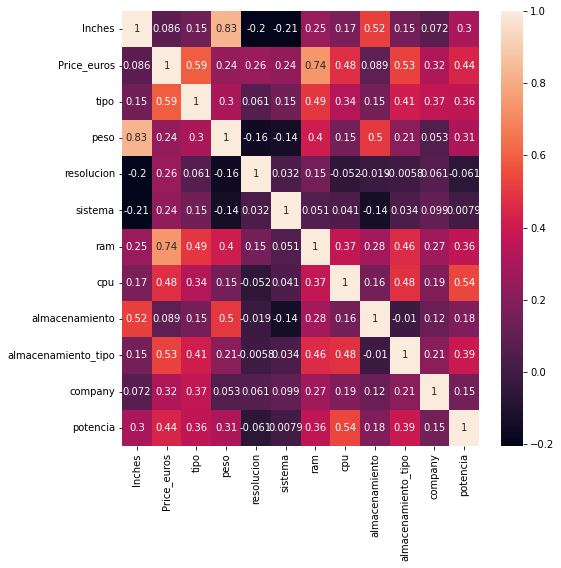

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.corr(), annot=True)   # Miramos las correlaciones de las columnas con la variable target (Price_euros)
                                        # Observamos que las que más correlan son la de la RAM, Tipo de almacenamiento y CPU

# Modelado

In [11]:
X = train.drop(["Company", "Product", "TypeName", "ScreenResolution", 
"Cpu","Ram", "Memory", "Gpu", "OpSys", "Weight", "Price_euros"], axis=1)
y = train["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24) # Dividimos en train y test

Intentamos con distintos modelos:

XGBRegressor

In [12]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predict_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, predict_xgb)
mse = mean_squared_error(y_test, predict_xgb)
rmse = np.sqrt(mean_squared_error(y_test, predict_xgb))

print("MAE:", mae_xgb)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 174.70234601463775
MSE: 63413.87800313396
RMSE: 251.82112302810097


RandomForestRegressor

In [13]:
forest = RandomForestRegressor(n_estimators=600, max_depth=12, max_features=2)
forest.fit(X_train, y_train)
predict_forest = forest.predict(X_test)

mae_forest = mean_absolute_error(y_test, predict_forest)
mse = mean_squared_error(y_test, predict_forest)
rmse = np.sqrt(mean_squared_error(y_test, predict_forest))

print("MAE:", mae_forest)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 173.60835127441914
MSE: 54967.38153412318
RMSE: 234.45123487438318


BaggingRegressor

In [14]:
bagging = BaggingRegressor(n_estimators=1000, max_samples=500, bootstrap=True)
bagging.fit(X_train, y_train)
predict_bagging = bagging.predict(X_test)

mae_bagging = mean_absolute_error(y_test, predict_bagging)
mse = mean_squared_error(y_test, predict_bagging)
rmse = np.sqrt(mean_squared_error(y_test, predict_bagging))

print("MAE:", mae_bagging)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 176.95773690823177
MSE: 60115.707983278044
RMSE: 245.18504844969246


AdaBoostRegressor

In [15]:
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.3)
ada.fit(X_train, y_train)
predict_ada = ada.predict(X_test)

mae_ada = mean_absolute_error(y_test, predict_ada)
mse = mean_squared_error(y_test, predict_ada)
rmse = np.sqrt(mean_squared_error(y_test, predict_ada))

print("MAE:", mae_ada)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 291.9201512565419
MSE: 114557.29196017084
RMSE: 338.4631323499959


DecisionTreeRegressor

In [16]:
tree = DecisionTreeRegressor(max_depth=12, max_features=3)
tree.fit(X_train, y_train)
predict_tree = tree.predict(X_test)

mae_tree = mean_absolute_error(y_test, predict_tree)
mse = mean_squared_error(y_test, predict_tree)
rmse = np.sqrt(mean_squared_error(y_test, predict_tree))

print("MAE:", mae_tree)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 238.76702838062056
MSE: 113949.43471170185
RMSE: 337.5639712879647


Organizamos en un DataFrame cada modelo y su MAE ya que es la métrica a batir en la competición.

In [17]:
pd.DataFrame({"Modelo" : ["XGBRegressor", "RandomForestRegressor", "BaggingRegressor", "AdaBoostingRegressor", "DecisionTreeRegressor"],
                "MAE" : [mae_xgb, mae_forest, mae_bagging, mae_ada, mae_tree]}).sort_values(by="MAE")

,Modelo,MAE
1,RandomForestRegressor,173.608351
0,XGBRegressor,174.702346
2,BaggingRegressor,176.957737
4,DecisionTreeRegressor,238.767028
3,AdaBoostingRegressor,291.920151


Vemos que de los 4 modelos aplicados el de XGBRegressor, RandomForestRegressor y BaggingRegressor dan los mejores resultados. 
Probaremos subiendo los 3 y con los datos de test aplicaremos mejor el de RandomForestRegressor para estos.

Vemos como hacer la submission:

In [18]:
sample = pd.read_csv("Dataset/data/sample_submission.csv") # Leemos el fcihero de ejemplo de como debe ser la submission

Leemos y modificamoes el dataset de test:

In [19]:
test = pd.read_csv("Dataset/data/test.csv", index_col=0)
test["tipo"] = test.apply(tipo, axis=1)
test["peso"] = test.apply(limpia_peso, axis=1)
test["resolucion"] = test.apply(resolucion, axis=1)    # Aplicamos las funciones sobre el DataFrame de entrenamiento
test["sistema"] = test.apply(sistema, axis=1)
test["ram"] = test.apply(ram, axis=1)
test["cpu"] = test.apply(cpu, axis=1)
test["almacenamiento"] = test.apply(almacenamiento, axis = 1)
test["almacenamiento_tipo"] = test.apply(almacenamiento_tipo, axis = 1)
test["company"] = test.apply(company, axis=1)
test["potencia"] = test.apply(potencia, axis=1)
test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,tipo,peso,resolucion,sistema,ram,cpu,almacenamiento,almacenamiento_tipo,company,potencia
id,,,,,,,,,,,,,,,,,,,,,
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,...,1,2.18,3,3,6,7,1024,1,9,2.6
815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,...,3,1.32,3,3,8,8,256,3,8,2.7
1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,...,1,1.54,3,6,4,7,256,3,9,2.3
1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,...,1,1.16,3,3,8,7,256,3,9,2.3
443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,...,1,2.20,3,3,4,3,128,3,8,1.1


Probamos con los 3 primeros para ver cual generaliza mejor con los datos de test.

In [20]:
data = test.drop(["Company", "Product", "TypeName", "ScreenResolution", 
"Cpu","Ram", "Memory", "Gpu", "OpSys", "Weight"], axis=1) # Tomamos las columnas que nos interesan del dataset de test

In [21]:
xgb.fit(X, y) # Entreno con la totalidad de datos del dataset de train, es decir, sin hacer train_test_split
test_xgb_predictions = xgb.predict(data)

In [22]:
forest.fit(X, y) # Entreno con la totalidad de datos del dataset de train, es decir, sin hacer train_test_split
test_forest_predictions = forest.predict(data)

In [23]:
bagging.fit(X, y) # Entreno con la totalidad de datos del dataset de train, es decir, sin hacer train_test_split
test_bagging_predictions = bagging.predict(data)

No instanciamos los modelos en si porque ya están declarados más arriba, solo reentreno con los datos del dataset train y aplico el método ```predict``` del objeto para hacer las predicciones del test.

Creamos las submissions:

In [24]:
xgb_submission = pd.DataFrame({"id": data.index, "Price_euros": test_xgb_predictions})

In [25]:
forest_submission = pd.DataFrame({"id": data.index, "Price_euros": test_forest_predictions})

In [26]:
bagging_submission = pd.DataFrame({"id": data.index, "Price_euros": test_bagging_predictions})

Definimos la funcion que verifica que la submission sea correcta.

In [27]:
def chequeator(df_to_submit, name):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                df_to_submit.to_csv(f"Dataset/submissions/{name}.csv", index = False) #muy importante el index = False
                print("Ready to submit!!!!!!")
            else:
                print("Revisa los id's e intenta de nuevo")
        else:
            print("Revisa los nombres de las columnas e intentalo de nuevo")
    else:
        print("Revisa el número de columnas y/o el de filas e inténtalo de nuevo")

In [28]:
chequeator(xgb_submission, "xgb_submission")

Ready to submit!!!!!!


In [29]:
chequeator(forest_submission, "forest_submission")

Ready to submit!!!!!!


In [30]:
chequeator(bagging_submission, "bagging_submission")

Ready to submit!!!!!!
